# Práctica 5 - Redes Neuronales Convolucionales

<h2>Objetivos</h2>
El objetivo de esta práctica es comprender el funcionamiento de las redes neuronales convolucionales

<h2>Temas</h2>

* Redes Neuronales Convolucionales. Capas Conv2D, MaxPooling Flatten, BatchNormalization, Dense. Parada Temprana.
* Data Augmentation.

<h2>Lectura</h2>
Material de Lectura: Capítulo 6 del libro Neural Networks and Deep Learning.

# Imports

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
!pip install livelossplot --quiet

from livelossplot import PlotLossesKeras

# Ejercicio 1

La base de datos MNIST contiene imágenes de 28×28, en escala de grises, de números escritos a mano.
Está conformada por 60.000 ejemplos de entrenamiento y 10.000 ejemplos de prueba.

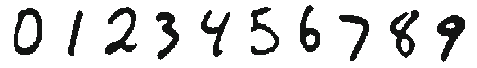

Para cargar las imágenes utilice:

<strong>from tensorflow.keras.datasets import mnist</strong>
<br><strong>(X_train, Y_train), (X_test, Y_test) = mnist.load_data()</strong>

Puede visualizar una imagen utilizando:

<strong>nImg = 0 # nro. de imagen a visualizar</strong>
<br><strong>plt.imshow(X_train[0, :,:], cmap='gray')</strong>

<ol type='a'>
<li>Con el conjunto de 60000 imágenes entrene una red neuronal convolucional para predecir el dígito
presente en la imagen. Recuerde normalizar los valores de cada imagen. Salve el modelo para recuperarlo después.</li>
<li>Levante el modelo guardado en el punto a) y utilice la clase DrawPanel del módulo utils.images de la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que pertenece.</li>
</ol>

In [31]:
from tensorflow.keras.datasets import mnist

# carga de datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [32]:
# reshape para segurar que las imágenes pueden ser leídas y usadas
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))

# escalar
X_train = X_train/255
X_test = X_test/255

In [33]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
input_shape = X_train[0].shape

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,378 (165.54 KB)

 Trainable params: 42,378 (165.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

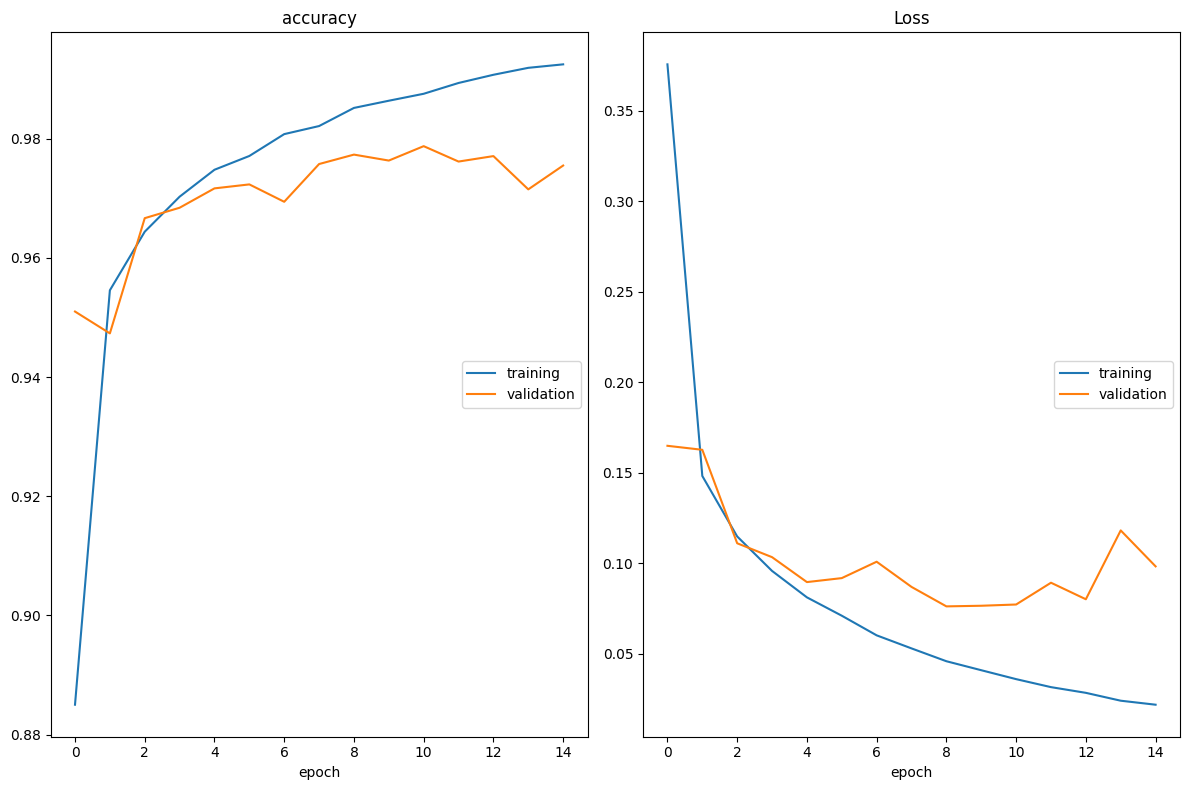

accuracy
	training         	 (min:    0.885, max:    0.992, cur:    0.992)
	validation       	 (min:    0.947, max:    0.979, cur:    0.975)
Loss
	training         	 (min:    0.022, max:    0.376, cur:    0.022)
	validation       	 (min:    0.076, max:    0.165, cur:    0.098)


In [ ]:
hist= model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=0)

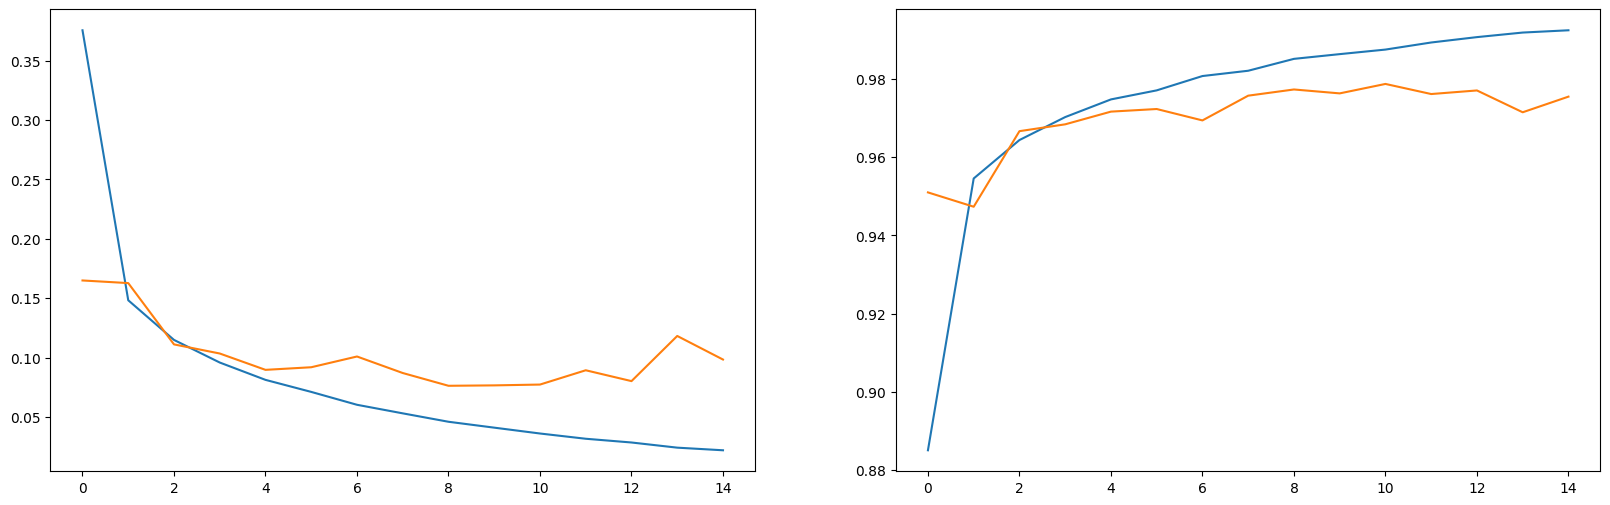

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))
axs[0].plot(hist.history['loss'], label='training_loss')
axs[0].plot(hist.history['val_loss'], label='validation_loss')

axs[1].plot(hist.history['accuracy'], label='training_accuracy')
axs[1].plot(hist.history['val_accuracy'], label='validation_accuracy')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


<Axes: >

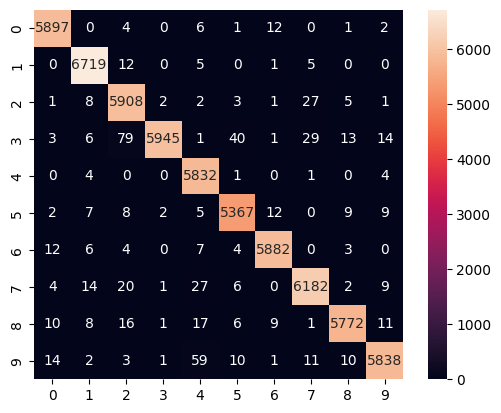

In [ ]:
predict = model.predict(X_train)

cm = metrics.confusion_matrix(np.argmax(y_train, axis=1), np.argmax(predict, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')

##Test

In [ ]:
pred_train = model.evaluate(X_train, y_train, verbose=0)
pred_test = model.evaluate(X_test, y_test, verbose=0)



[0.03657897934317589, 0.9890333414077759]

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

In [ ]:
print(f'Train \nLoss: {pred_train[0]}, Accuracy:{pred_train[1]*100}')
print(f'Test \nLoss: {pred_test[0]}, Accuracy:{pred_test[1]*100}')

Train 
Loss: 0.03657897934317589, Accuracy:98.90333414077759
Test 
Loss: 0.09473387897014618, Accuracy:97.5600004196167


In [ ]:
model.save('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/e1_MNIST_modelo.h5')


# Ejercicio 2

Se buscará resolver la clasificación de los dígitos de MNIST usando la siguiente configuración:

<br><strong>model = Sequential()</strong>
<br><strong>model.add(Input(shape=(28, 28, 1)))</strong>
<br><strong>model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))</strong>
<br><strong>model.add(MaxPooling2D(pool_size=(2,2)))</strong>
<br># -- opcional --
<br><strong>model.add(Flatten())</strong>
<br><strong>model.add(Dense(10,activation='softmax'))</strong>
<br><strong>model.summary()</strong>

donde F es la cantidad de filtros o de mapas de características, K es el tamaño del kernel o máscara, S es el valor del stride y FUN es la función de activación de la capa de convolución.

La tabla que aparece a continuación sugiere los valores a utilizar. Se recomienda emplear Parada Temprana para reducir el tiempo de entrenamiento. Para ello utilice

<br><strong>from tensorflow.keras.callbacks import EarlyStopping</strong>
<br><strong>es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)</strong>

Esto indica que, si el valor del accuracy sobre los datos de validación no mejora después de 5 épocas, el entrenamiento finaliza. Puede usarse el parámetro min_delta para indicar cuando la diferencia entre dos accuracy se considerará significativa.

Luego agregue este objeto en el momento del entrenamiento por
medio del párametro callbacks

<br><strong>H = model.fit(x = X_train, y = Y_train, batch_size = LOTES,
validation_data = (X_test, Y_test), epochs=4000, callbacks=[es])</strong>

In [51]:
F=64
K=3
S=1

FUN='sigmoid'

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S),activation=FUN))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# -- opcional --
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │         108,170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,810 (425.04 KB)

 Trainable params: 108,810 (425.04 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
LOTES = 32
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

h = model.fit(x = X_train, y = y_train, batch_size = LOTES, validation_data = (X_test, y_test), epochs=4000, callbacks=[es])

Epoch 1/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5734 - loss: 1.4503 - val_accuracy: 0.8973 - val_loss: 0.3620
Epoch 2/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8775 - loss: 0.4325 - val_accuracy: 0.8875 - val_loss: 0.3916
Epoch 3/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9016 - loss: 0.3546 - val_accuracy: 0.9287 - val_loss: 0.2733
Epoch 4/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9298 - loss: 0.2516 - val_accuracy: 0.9504 - val_loss: 0.1806
Epoch 5/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9459 - loss: 0.1870 - val_accuracy: 0.9652 - val_loss: 0.1193
Epoch 6/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9600 - loss: 0.1382 - val_accuracy: 0.9629 - val_loss: 0.1252
Epoch 7/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9640 - loss: 0.1222 - val_accuracy: 0.9701 - val_loss: 0.1079
Epoch 8/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 -

In [ ]:
h.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [53]:
pred_y = model.evaluate(X_test, y_test, verbose=0)

In [54]:
print(f'Accuracy train: {(np.sum(h.history["accuracy"])/len(h.history["accuracy"]))*100}')
print(f'Accuracy test: {pred_y[1]*100}')
print(f'Épocas: {len(h.epoch)}')

Accuracy train: 96.01420267768528
Accuracy test: 97.79999852180481
Épocas: 23


# Ejercicio 3

Para resolver este ejercicio utilice un modelo de red neuronal convolucional que reconozca la cantidad de
dedos extendidos en cada mano de las imágenes que conforman el juego de datos “Fingers”.

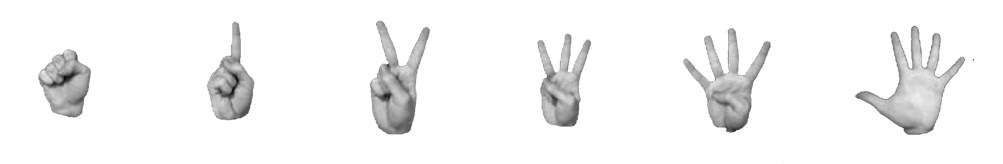

La versión original de este de estas imágenes se encuentra en https://www.kaggle.com/koryakinp/fingers.

Puede hallar una versión reducida de estas imágenes en el Moodle del curso, en la misma sección donde se encuentra este enunciado de práctica. También encontrará allí ejemplos sobre cómo cargar estas imágenes y cómo procesarlas con una red neuronal convolucional.

<ol type='a'>
<li>Entrene y pruebe un modelo utilizando los datos de las carpetas test y train, midiendo accuracy</li>
<li>Genere una versión del dataset para test agregando transformaciones al azar sobres imágenes
originales. Haga rotaciones entre -45 y 45 grados, repita el test y mida el accuracy.</li>
<li>Genere una versión del dataset train como la realizada en b) y repita entrenamiento y prueba de a)
con los datasets de modificados.</li>
</ol>


In [4]:
import glob
from skimage import io
from skimage.transform import rotate

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
def import_data(img_list):
  labels = []
  data = []
  img_count = len(img_list)
  for i in range(len(img_list)):
    img = img_list[i]
    read_img = io.imread(img)
    read_img = read_img/read_img.max()
    read_img = read_img.reshape(*read_img.shape, 1)
    data.append(read_img)
    labels.append(img[-6])
    if i % 100 == 0:
      print("\rCargando imágenes: %6.2f%%" % (100*i/img_count), end="")
  print("\rCargando imágenes:  100.00%% (%d) \n" % img_count)
  return np.array(data), np.array(labels)

In [7]:
archivos_train = glob.glob('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/fingers/train/'+'*png')
archivos_test = glob.glob('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/fingers/test/'+'*png')

In [9]:
x_train,y_train=import_data(archivos_train)
x_test,y_test=import_data(archivos_test)

Cargando imágenes:  100.00% (8772) 

Cargando imágenes:  100.00% (3600) 



In [10]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##3.a)
Entrene y pruebe un modelo utilizando los datos de las carpetas test y train, midiendo accuracy

In [11]:
i_shape = x_train.shape[1:]
i_shape

(128, 128, 1)

In [12]:
output = y_train.shape[1]

In [13]:
k=3
s=1
fun='relu'

In [14]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(k,k), strides=(s,s), activation=fun, input_shape= i_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, kernel_size=(k,k), strides=(s,s), activation=fun))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(64, activation=fun))
model.add(Dense(output, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,724,422 (14.21 MB)

 Trainable params: 3,724,422 (14.21 MB)

 Non-trainable params: 0 (0.00 B)

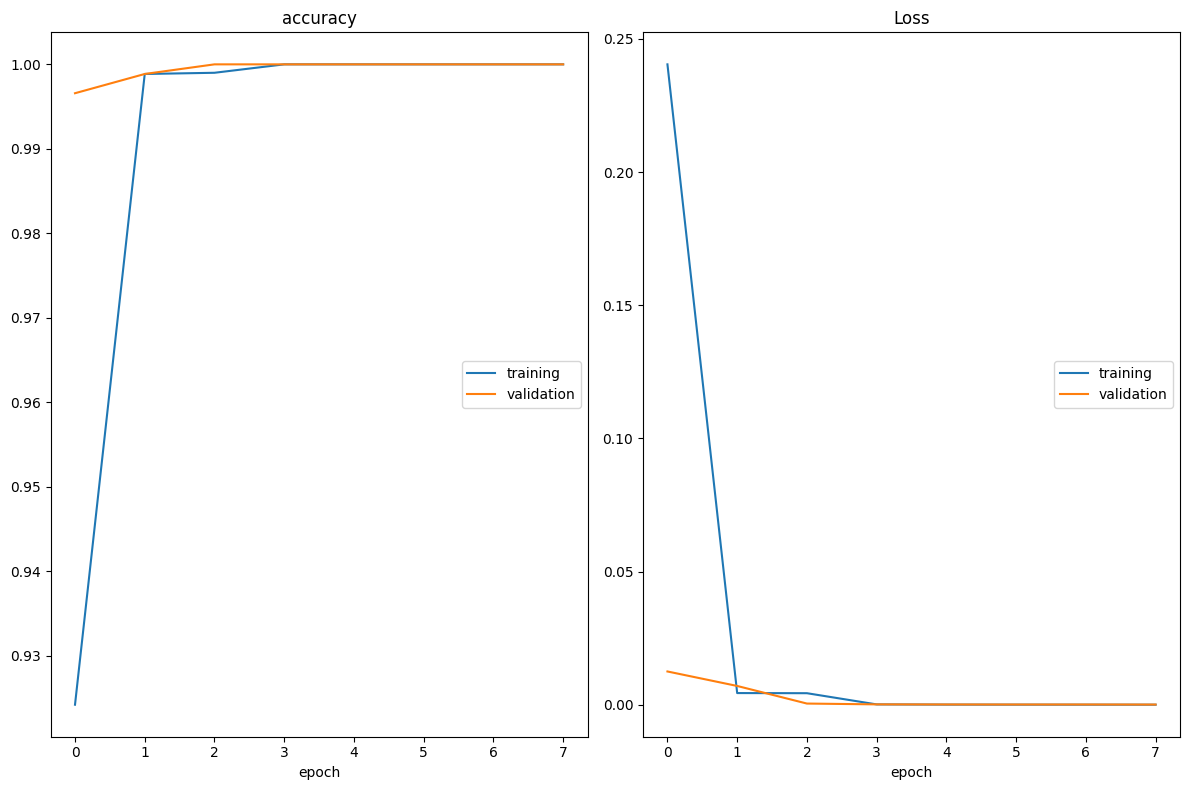

accuracy
	training         	 (min:    0.924, max:    1.000, cur:    1.000)
	validation       	 (min:    0.997, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.240, cur:    0.000)
	validation       	 (min:    0.000, max:    0.012, cur:    0.000)


In [15]:
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist= model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[PlotLossesKeras(), es], verbose=0)

In [16]:
train_eval = model.evaluate(x_train, y_train, verbose=0)

In [17]:
print(f'Accuracy train: {train_eval[1]*100}')

Accuracy train: 100.0


##Test

In [18]:
test_eval= model.evaluate(x_test, y_test, verbose=0)

print(f'Accuracy: {test_eval[1]*100}')

Accuracy: 100.0


In [25]:
y_pred = model.predict(x_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [26]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

cm = metrics.confusion_matrix(y_true, y_pred)

cm

array([[600,   0,   0,   0,   0,   0],
       [  0, 600,   0,   0,   0,   0],
       [  0,   0, 600,   0,   0,   0],
       [  0,   0,   0, 600,   0,   0],
       [  0,   0,   0,   0, 600,   0],
       [  0,   0,   0,   0,   0, 600]])

In [30]:
classification_report = metrics.classification_report(y_true, y_pred, digits=4, output_dict=True)

report_df = pd.DataFrame(classification_report).transpose()

report_df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,600.0
1,1.0,1.0,1.0,600.0
2,1.0,1.0,1.0,600.0
3,1.0,1.0,1.0,600.0
4,1.0,1.0,1.0,600.0
5,1.0,1.0,1.0,600.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,3600.0
weighted avg,1.0,1.0,1.0,3600.0


In [21]:
model.save('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/fingers/modeloP5-e3a.h5')